In [13]:
# LinearRegression

In [1]:
import numpy as np

fish_length = np.array(
    [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
     )
fish_weight = np.array(
    [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
)

In [3]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(fish_length, fish_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다

In [5]:
train_input = fish_length.reshape(-1, 1)
train_target = fish_weight

In [7]:
# k-최근접 이웃 회귀 모델
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

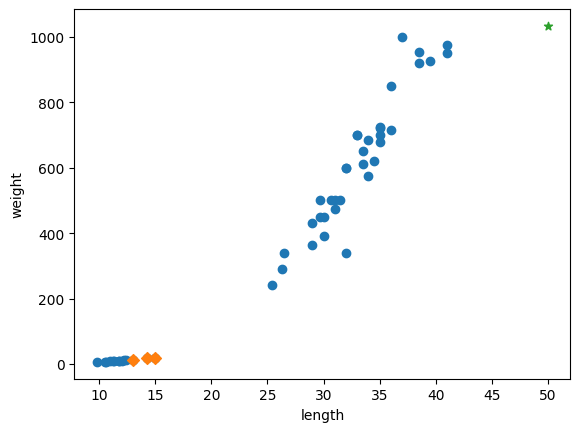

In [9]:
distances, indexes = knr.kneighbors([[15]])

import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel('weight')

# 예측에 사용된 이웃 & 예측된 값
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, 1033.33333333, marker='*')
plt.show()

In [14]:
# 선형회귀

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [17]:
lr.fit(train_input, train_target)

LinearRegression()

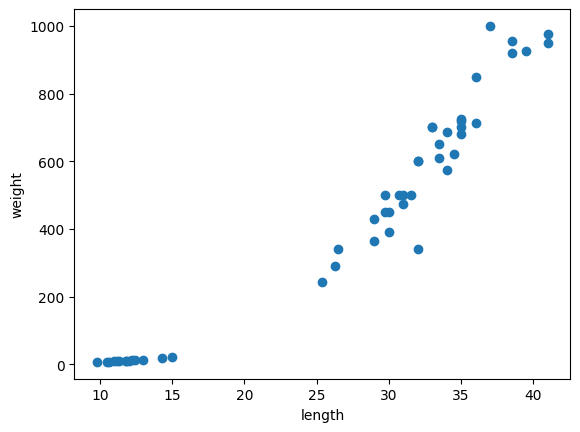

In [20]:
A = lr.coef_
B = lr.intercept_

plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

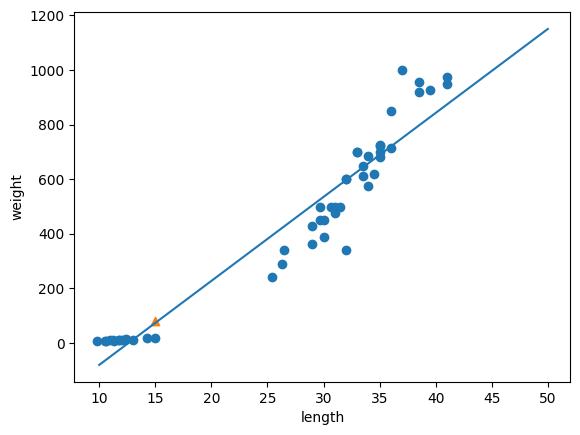

In [21]:
plt.scatter(train_input, train_target)
plt.plot([10, 50], [10 * A + B, 50 * A + B])
plt.scatter(15, 79, marker='^')
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [22]:
train_poly = np.column_stack((train_input ** 2, train_input))

In [23]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [25]:
train_poly

array([[ 645.16,   25.4 ],
       [ 691.69,   26.3 ],
       [ 702.25,   26.5 ],
       [ 841.  ,   29.  ],
       [ 841.  ,   29.  ],
       [ 882.09,   29.7 ],
       [ 882.09,   29.7 ],
       [ 900.  ,   30.  ],
       [ 900.  ,   30.  ],
       [ 942.49,   30.7 ],
       [ 961.  ,   31.  ],
       [ 961.  ,   31.  ],
       [ 992.25,   31.5 ],
       [1024.  ,   32.  ],
       [1024.  ,   32.  ],
       [1024.  ,   32.  ],
       [1089.  ,   33.  ],
       [1089.  ,   33.  ],
       [1122.25,   33.5 ],
       [1122.25,   33.5 ],
       [1156.  ,   34.  ],
       [1156.  ,   34.  ],
       [1190.25,   34.5 ],
       [1225.  ,   35.  ],
       [1225.  ,   35.  ],
       [1225.  ,   35.  ],
       [1225.  ,   35.  ],
       [1296.  ,   36.  ],
       [1296.  ,   36.  ],
       [1369.  ,   37.  ],
       [1482.25,   38.5 ],
       [1482.25,   38.5 ],
       [1560.25,   39.5 ],
       [1681.  ,   41.  ],
       [1681.  ,   41.  ],
       [  96.04,    9.8 ],
       [ 110.25,   10.5 ],
 

In [38]:
A = lr.coef_[0]
B = lr.coef_[1]
C = lr.intercept_
print(A)
print(B)
print(C)

0.9989892726106419
-16.90584948784516
67.98074116425875


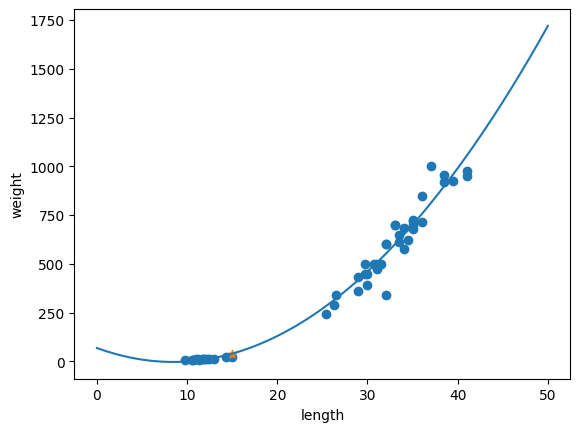

In [35]:
points = np.arange(0, 51)
plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel('weight')

plt.plot(points, (A * points**2) + (B * points) + C)
plt.scatter([15], [37.7], marker='*')
plt.show()

In [29]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(lr, f)

In [32]:
with open("model.pkl", "rb") as f:
    fish_model = pickle.load(f)